In [107]:
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [29]:
from sympy import *
import sympy

In [30]:
mu1=0.00625
mu2=0.00956
mu3=0.00689251
s1=0.04829
s2=0.15184
s3=0.05421996
rho=0.08179
cov12=0.0005997
cov13=0.00103
cov23=0.00235921

In [31]:
#c
a1=sympy.Symbol('a1')

mup=a1*mu1+(1-a1)*mu2
s2p=(s1**2)*(a1**2)+(1-a1)**2*(s2**2)+2*(1-a1)*a1*rho*s1*s2

def ut(a1):
    return mup-0.5*s2p
ut(a1)
f1=sympy.diff(ut(a1))
aE=solve(f1,a1)
aE=float(aE[0])
aE

0.7915398037558097

In [32]:
muE=aE*mu1+(1-aE)*mu2
sE=((s1**2)*(aE**2)+(1-aE)**2*(s2**2)+2*(1-aE)*aE*rho*s1*s2)**0.5
uE=muE-0.5*(sE**2)
print(sE,muE,uE)

0.05158323686639616 0.006940003249568271 0.0056095880867609044


In [33]:
# number of discrete wealth allocations to asset 1
steps = np.linspace(-0.5, 1.5, 2000)

port = pd.DataFrame({'steps': steps})

# series for mean & std
port['mean'] = 0.00956 - 0.00331*port['steps']
port['std'] = ((0.024187)*(port['steps']**2)-(0.0449)*(port['steps']) + 0.023055)**(0.5)

In [34]:
sd = np.linspace(0, 0.2, 2000)
ut = pd.DataFrame({'sd': sd})

# series for utility fn
ut['mu']= uE+0.5*ut['sd']**2
ut['mu1']=0.008+0.5*ut['sd']**2
ut['mu2']=0.004+0.5*ut['sd']**2


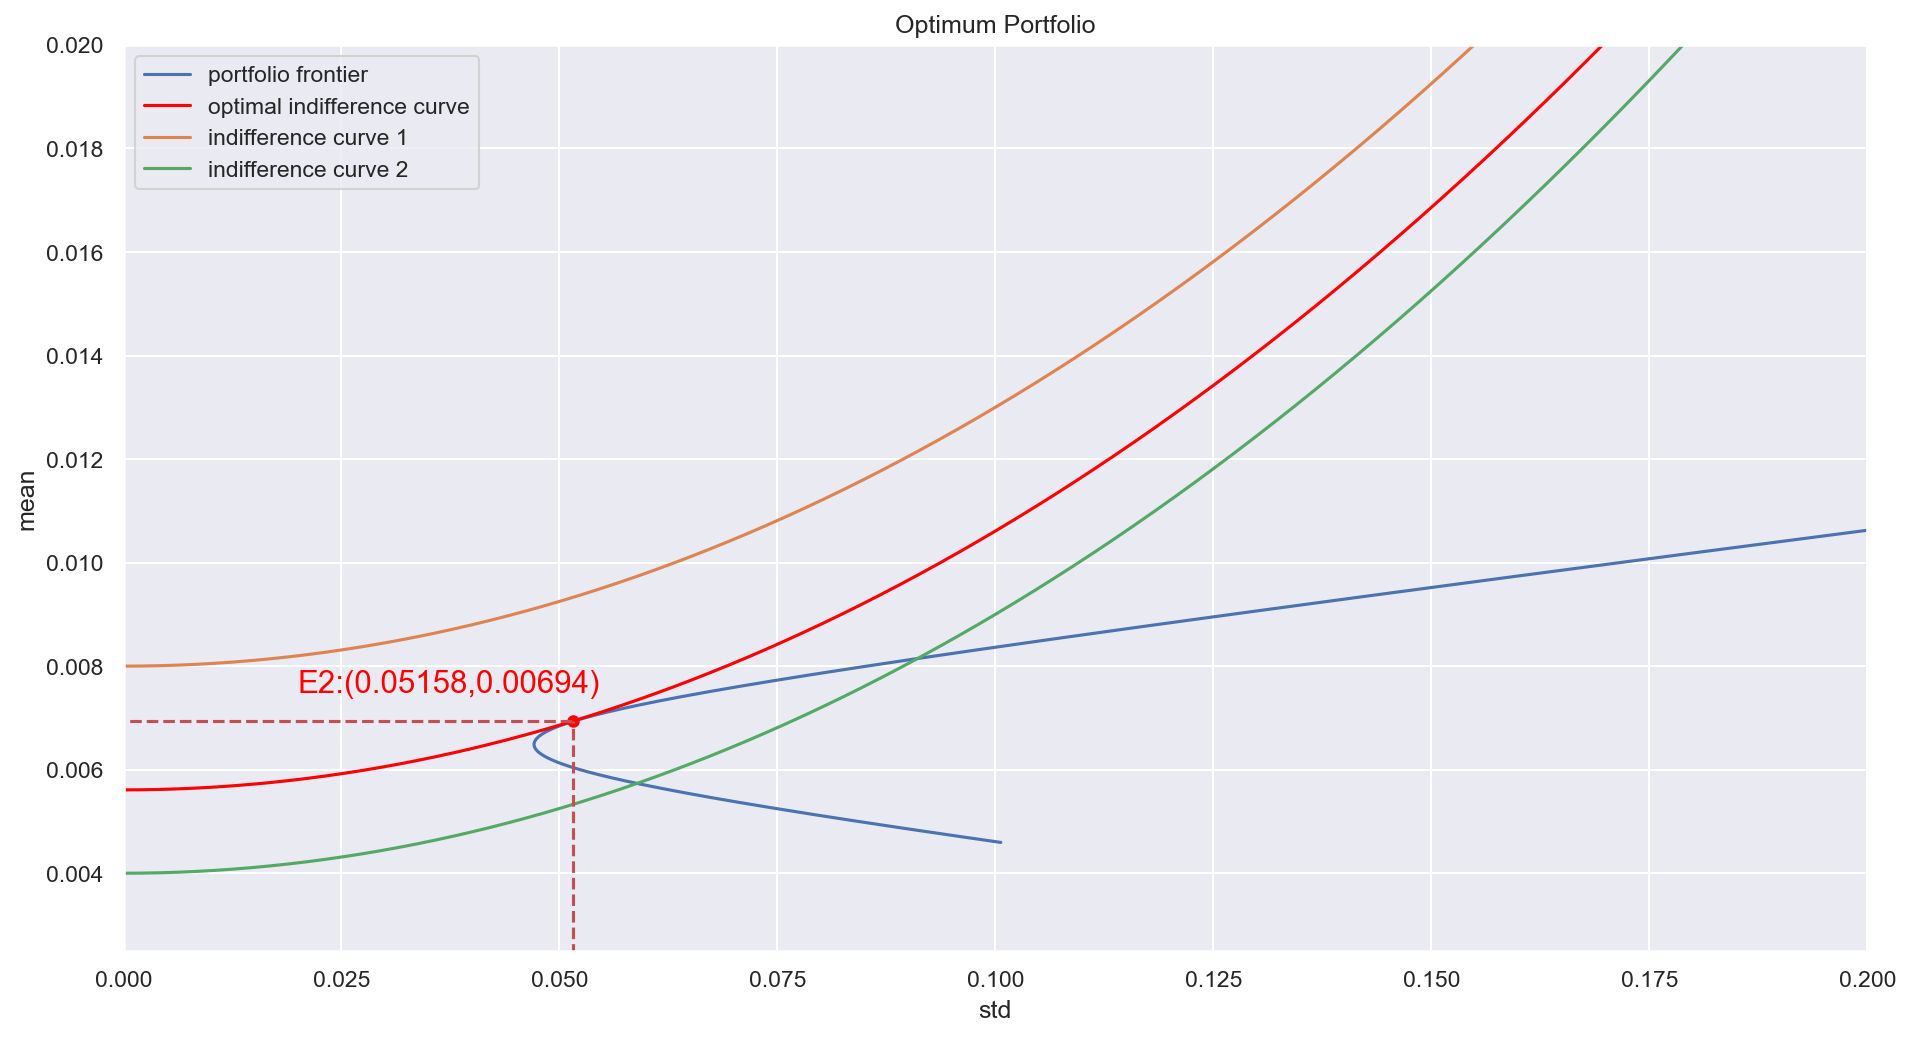

In [131]:
plt.figure(figsize=(15,8),dpi=150)
plt.plot(port['std'],port['mean'],label='portfolio frontier')
sns.set(style='darkgrid')
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Optimum Portfolio')

plt.plot(ut['sd'],ut['mu'],label='optimal indifference curve',color='red')
plt.plot(ut['sd'],ut['mu1'],label='indifference curve 1')
plt.plot(ut['sd'],ut['mu2'],label='indifference curve 2')
plt.xlim(0,0.2)
plt.ylim(0.0025,0.02)
plt.scatter([0.05158],[0.00694],color='red',s=25)
plt.plot([-0.005,0.05158],[0.00694,0.00694],c='r',linestyle='--')
plt.plot([0.05158,0.05158],[0,0.00694],c='r',linestyle='--')
plt.text(0.02,0.0075,'E2:(0.05158,0.00694)',size=15,color='red')
plt.legend()
plt.show()

In [132]:
#自动追踪点
fig = go.Figure(go.Scatter(x=port['std'], y=port['mean'], text=port['steps'], 
                           mode='markers', name='portfolio', marker_color='lightblue'))

fig.update_traces(textposition='bottom center', textfont_size=16)
fig.update_traces(hovertemplate="Std: %{x:.4f} <br>Mu: %{y:.4f} <br>a1: %{text:.4f}")
fig.update_layout(xaxis_title='Portfolio risk', 
                  yaxis_title='Portfolio return', 
                  title='Portfolio Frontier',
                  title_x=0.5,
                  plot_bgcolor='rgb(0,0,0)')

In [55]:
a12 = np.linspace(0, 1, 2000)
a22=1-a12

p2 = pd.DataFrame({'a1':a12,'a2':a22})

p2['mean'] = mu1*p2['a1']+mu2*p2['a2']
p2['std'] = ((s1**2)*(p2['a1']**2)+(s2**2)*(p2['a2']**2)+2*p2['a1']*p2['a2']*cov12)**0.5
p2=p2[p2['a2']>=0]

In [129]:
#d random list of a1 a2
ra1=[]
ra2=[]
for i in range (0,2000):
    ra1.append(random.uniform(0,1))
for i in range (0,2000):
    ra2.append(random.uniform(0,1))

In [130]:

p3 = pd.DataFrame({'a1':ra1,'a2':ra2})

# series for mean & std
p3['a3']=1-p3['a1']-p3['a2']
p3['mean'] = mu1*p3['a1']+mu2*p3['a2']+mu3*p3['a3']
p3['std'] = ((s1**2)*(p3['a1']**2)+(s2**2)*(p3['a2']**2)+(s3**2)*(p3['a3']**2)+2*p3['a1']*p3['a2']*cov12+2*p3['a1']*p3['a3']*cov13+2*p3['a2']*p3['a3']*cov23)**0.5
p3['sum'] = p3['a1']+p3['a2']+p3['a3']
p3=p3[p3['a3']>=0]
p3

,a1,a2,a3,mean,std,sum
0,0.446034,0.238172,0.315793,0.007241,0.053267,1.0
1,0.287084,0.517375,0.195541,0.008088,0.085130,1.0
2,0.300273,0.633070,0.066657,0.008388,0.099658,1.0
7,0.770553,0.093083,0.136365,0.006646,0.044737,1.0
8,0.875383,0.057001,0.067616,0.006482,0.045555,1.0
...,...,...,...,...,...,...
1992,0.083908,0.201546,0.714546,0.007376,0.057247,1.0
1994,0.139165,0.744167,0.116668,0.008788,0.115846,1.0
1997,0.835191,0.011338,0.153471,0.006386,0.044525,1.0
1998,0.407637,0.175515,0.416847,0.007099,0.048884,1.0


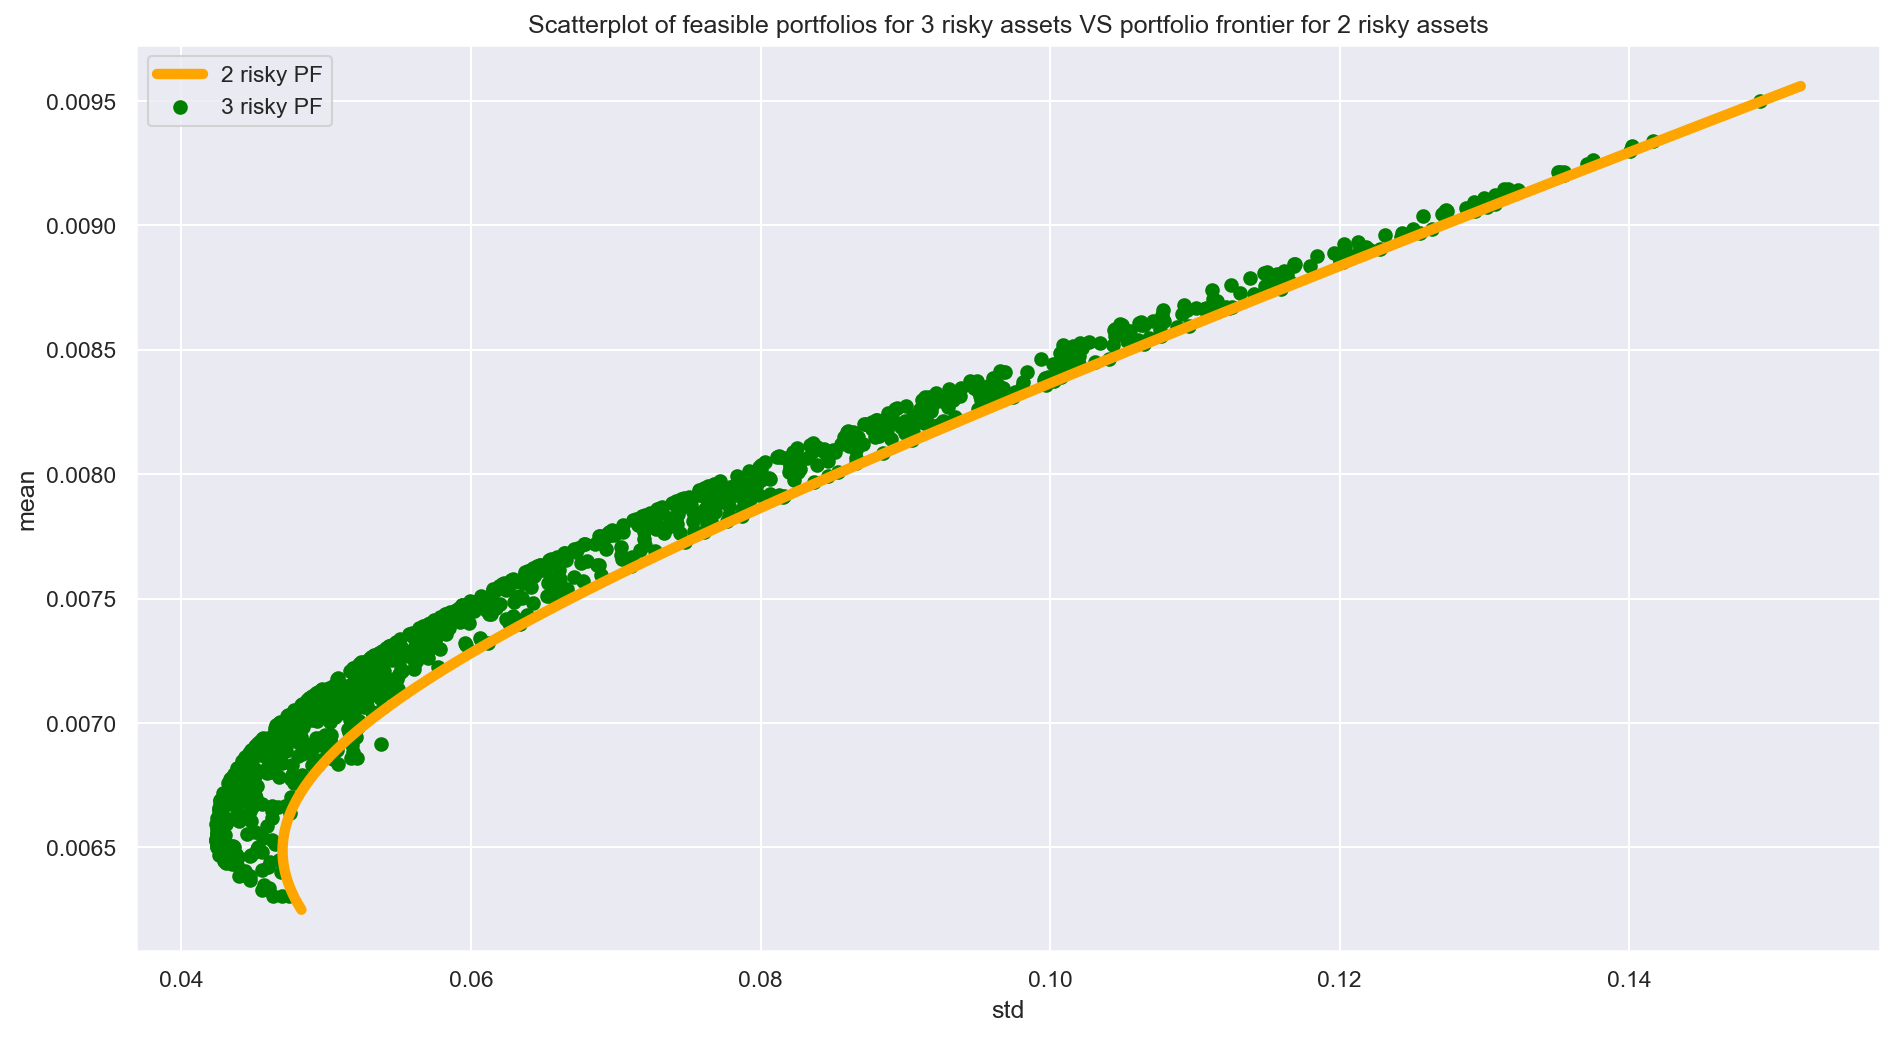

In [138]:
plt.figure(figsize=(15,8),dpi=150)
plt.scatter(p3['std'],p3['mean'],label='3 risky PF',color='green')
plt.plot(p2['std'],p2['mean'],label='2 risky PF',linewidth=5,color='orange')
sns.set(style='darkgrid')
plt.xlabel('std')
plt.ylabel('mean')
plt.legend()
plt.title('Scatterplot of feasible portfolios for 3 risky assets VS portfolio frontier for 2 risky assets')

plt.show()

In [139]:
p3['ut'] = p3['mean']-0.5*(p3['std']**2)

In [145]:
sortedp3 = p3.sort_values(['ut'],ascending=False)

In [153]:
sortedp3['ut'][0]

0.00582254749237875

In [170]:
sd = np.linspace(0, 0.2, 2000)
ut3 = pd.DataFrame({'sd': sd})

# series for indifference curves
ut3['mu']= 0.006+0.5*ut3['sd']**2
ut3['mu1']=0.008+0.5*ut3['sd']**2
ut3['mu2']=0.004+0.5*ut3['sd']**2

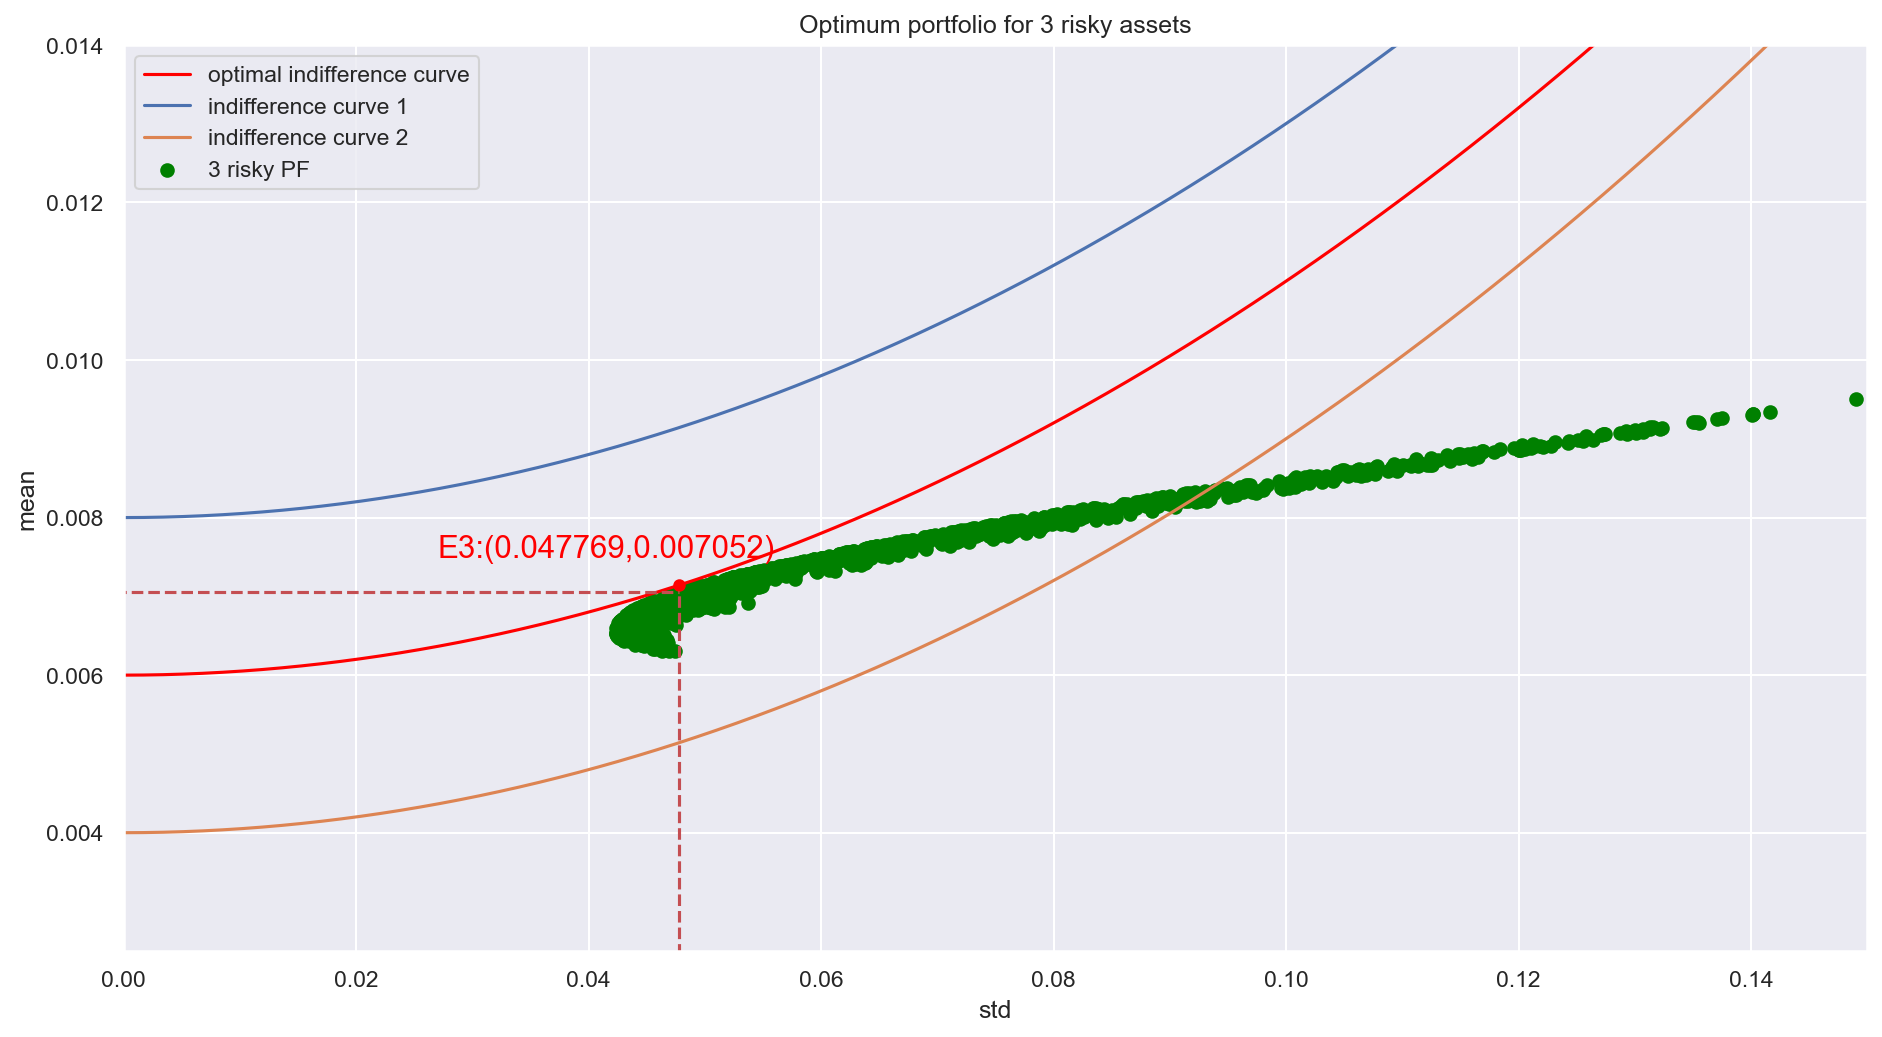

In [175]:
plt.figure(figsize=(15,8),dpi=150)
plt.scatter(p3['std'],p3['mean'],label='3 risky PF',color='green')
sns.set(style='darkgrid')
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Optimum portfolio for 3 risky assets')

plt.plot(ut3['sd'],ut3['mu'],label='optimal indifference curve',color='red')
plt.plot(ut3['sd'],ut3['mu1'],label='indifference curve 1')
plt.plot(ut3['sd'],ut3['mu2'],label='indifference curve 2')
plt.legend()
plt.xlim(0,0.15)
plt.ylim(0.0025,0.014)
plt.scatter([0.047769],[0.00715],color='red',s=25)
plt.plot([-0.005,0.047769],[0.007052,0.007052],c='r',linestyle='--')
plt.plot([0.047769,0.047769],[0,0.007052],c='r',linestyle='--')
plt.text(0.027,0.0075,'E3:(0.047769,0.007052)',size=15,color='red')

plt.show()